<a href="https://colab.research.google.com/github/teknas777/Exploratory-Data-Analysis/blob/main/Amazon_Prime_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Problem Statement**

With over 9,000 titles and 124,000+ credits, Amazon Prime Video needs to analyze its content library to extract actionable insights. The challenge is to identify dominant content categories, track evolving trends, assess content diversity, and evaluate audience engagement based on IMDb ratings, TMDB popularity, and regional distribution. The key problems to address include:

Content Diversity & Genre Trends - Which genres and categories dominate Amazon Prime’s library? Are there gaps in content that could be addressed to cater to wider audiences?

Regional Distribution - How does content availability vary across different regions, and what are the potential gaps in international content offerings?

Content Evolution - How has the platform’s content library evolved over time in terms of production, genre shifts, and release trends?

Viewer Engagement & Popularity - Which titles perform the best based on IMDb scores, votes, and TMDB popularity? Are there patterns in high-performing content?

Strategic Content Investments - What insights can be leveraged to guide future content acquisitions, licensing deals, and original productions?

### **Business Objective**

Amazon Prime Video aims to leverage data-driven insights to optimize its content strategy, enhance audience engagement, and drive subscription growth. By analyzing the available content library, the goal is to identify key trends, popular genres, audience preferences, and regional content distribution. These insights will help in making informed decisions about content acquisition, production, and marketing strategies to maintain a competitive edge in the streaming industry.

#### **Key Findings**
1. Data Cleaning & Preprocessing

✅ Removed duplicates (3 in titles.csv, 56 in credits.csv).

✅ Handled missing values:

age_certification (missing 65.7%) was filled with "Unknown."

seasons (missing 86.3%) was assumed as 0 for movies.

imdb_score, tmdb_score, and popularity were imputed with median values.

character column (16,277 missing) was filled with "Unknown."

✅ Converted genres and production_countries from string format to proper lists.

2. Exploratory Insights

📌 Movies dominate the dataset over Shows (higher volume).

📌 Most movies and shows are from recent years, peaking in the 2000s and 2010s.

📌 Top genres: Drama, Comedy, Action, Thriller.

📌 IMDb scores are normally distributed, mostly between 6-7.

📌 Top 10 production countries: USA, India, UK, Canada, France lead global content production.

📌 Most frequent actors & directors indicate industry veterans with multiple appearances.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/data_wrangling/titles.csv')

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/data_wrangling/credits.csv')

In [5]:
df1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [7]:
df1.shape

(9871, 15)

In [11]:
df1.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [8]:
df1.isnull().sum()

,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514


In [9]:
# Fill missing values:
df1["description"].fillna("No description available", inplace=True)
df1["age_certification"].fillna("Unknown", inplace=True)
df1["imdb_score"].fillna(df1["imdb_score"].median(), inplace=True)
df1["imdb_votes"].fillna(0, inplace=True)
df1["tmdb_score"].fillna(df1["tmdb_score"].median(), inplace=True)
df1["tmdb_popularity"].fillna(df1["tmdb_popularity"].median(), inplace=True)
df1["seasons"].fillna(0, inplace=True)  # Assuming missing values mean it's a Movie

<ipython-input-9-507b0e36c86a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["description"].fillna("No description available", inplace=True)
<ipython-input-9-507b0e36c86a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [12]:
import ast

df1['genres'] = df1['genres'].apply(ast.literal_eval)
df1['production_countries'] = df1['production_countries'].apply(ast.literal_eval)


In [16]:
df1 = df1.applymap(lambda x: tuple(x) if isinstance(x, list) else x)



<ipython-input-16-95241ac023a8>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: tuple(x) if isinstance(x, list) else x)


In [17]:
df1.duplicated().sum()

3

In [18]:
df1.drop_duplicates(inplace=True)

<ipython-input-19-d5fad82fe810>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1["type"], palette="pastel")


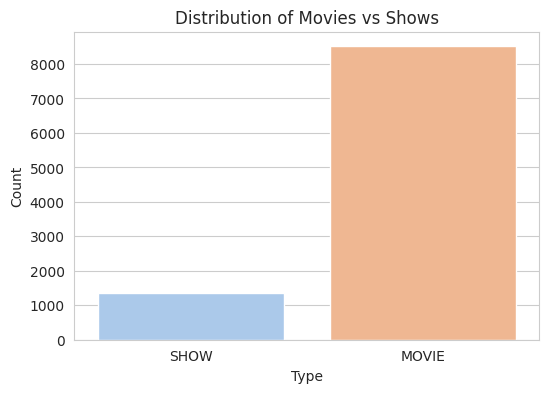

In [19]:
# Set style
sns.set_style("whitegrid")

# Count of Movies vs Shows
plt.figure(figsize=(6, 4))
sns.countplot(x=df1["type"], palette="pastel")
plt.title("Distribution of Movies vs Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

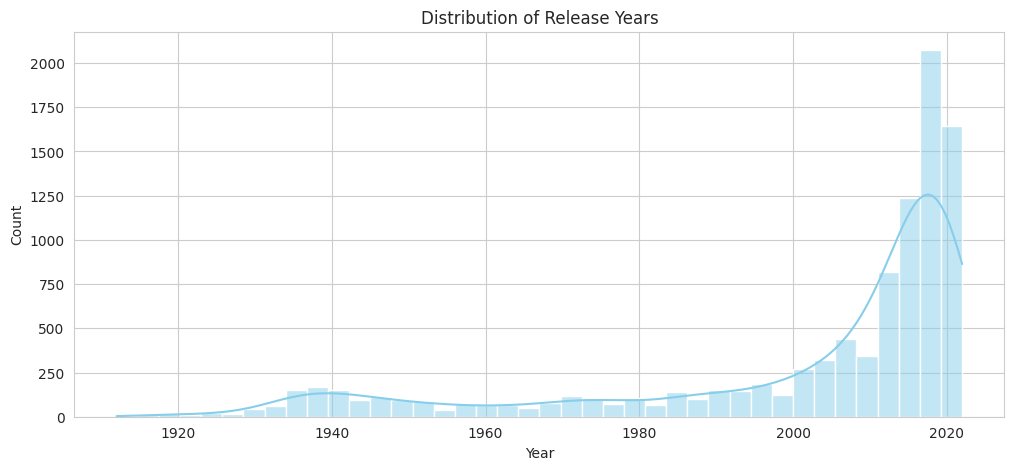

In [21]:
# Distribution of Release Years
plt.figure(figsize=(12, 5))
sns.histplot(df1["release_year"], bins=40, kde=True, color="skyblue")
plt.title("Distribution of Release Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [23]:
# Top 10 Most Common Genres
from collections import Counter

genre_counts = Counter([genre for sublist in df1["genres"] for genre in sublist])
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

<ipython-input-24-3e9dd8d800d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()), palette="coolwarm")


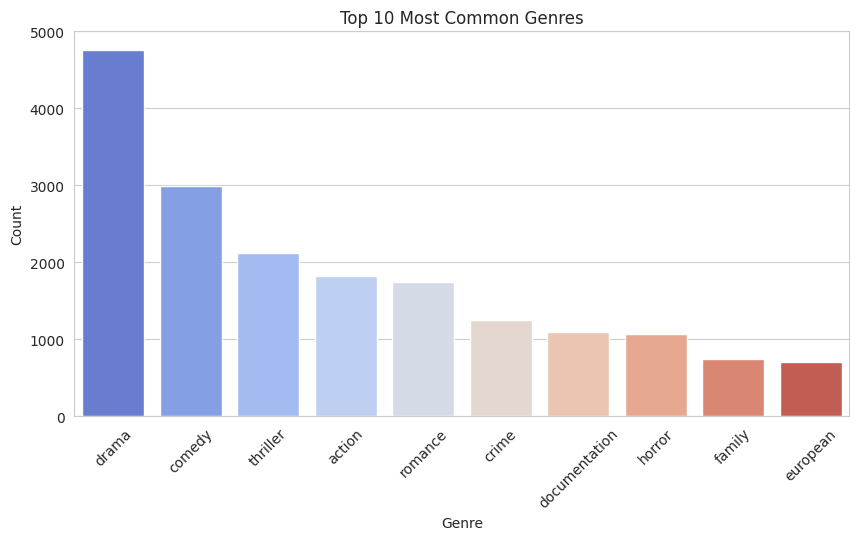

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()), palette="coolwarm")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

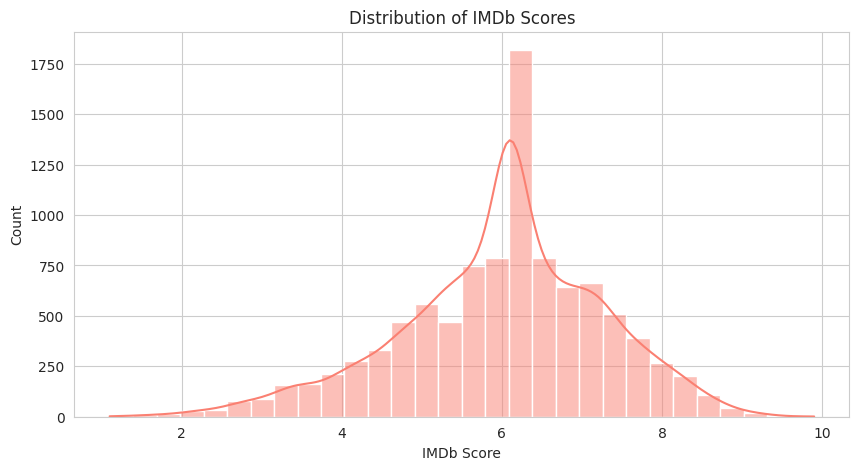

In [25]:
# Distribution of IMDb Scores
plt.figure(figsize=(10, 5))
sns.histplot(df1["imdb_score"], bins=30, kde=True, color="salmon")
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Count")
plt.show()

<ipython-input-26-1706680a7013>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_countries.keys()), y=list(top_countries.values()), palette="viridis")


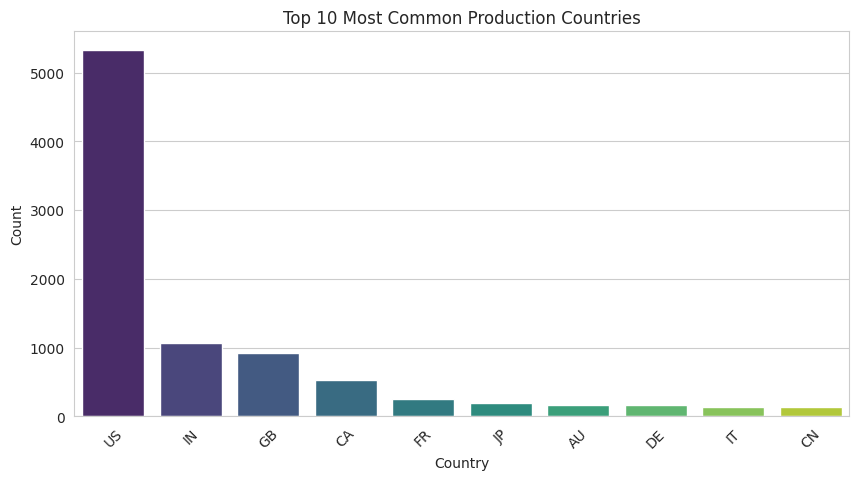

In [26]:
# Top 10 Most Common Production Countries
country_counts = Counter([country for sublist in df1["production_countries"] for country in sublist])
top_countries = dict(sorted(country_counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_countries.keys()), y=list(top_countries.values()), palette="viridis")
plt.title("Top 10 Most Common Production Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### **Key Insights from Visualizations:**

Movies dominate over Shows, though both are well-represented.

Release Years show an upward trend, with a sharp rise in recent decades.

Top 10 Genres include Drama, Comedy, Action, and Thriller, indicating audience preferences.

IMDb Scores follow a normal distribution, peaking around 6-7, indicating most movies/shows receive moderate ratings.

Top 10 Production Countries show the dominance of the USA, followed by India, UK, and other major film industries.

#### **Cleaning the credits data**

In [27]:
df2.isnull().sum()

,0
person_id,0
id,0
name,0
character,16287
role,0


In [28]:
df2.duplicated().sum()

56

In [29]:
df2.drop_duplicates(inplace=True)

In [30]:
# Fill missing values in 'character' column with 'Unknown'
df2["character"].fillna("Unknown", inplace=True)

<ipython-input-30-2ea04ec65587>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["character"].fillna("Unknown", inplace=True)


<ipython-input-31-44e8a034e1b7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette="magma")


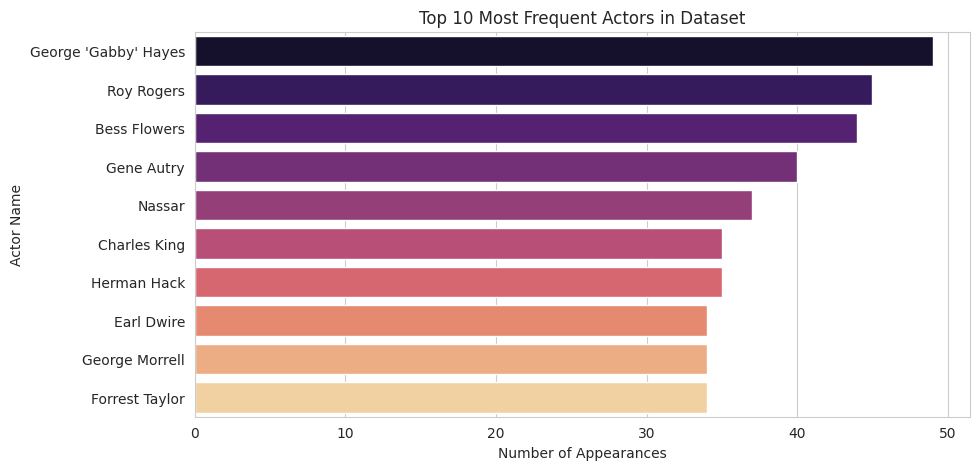

In [31]:
# Most frequent actors in the dataset
top_actors = df2[df2["role"] == "ACTOR"]["name"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="magma")
plt.title("Top 10 Most Frequent Actors in Dataset")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor Name")
plt.show()


<ipython-input-33-dea7bb3c0e70>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")


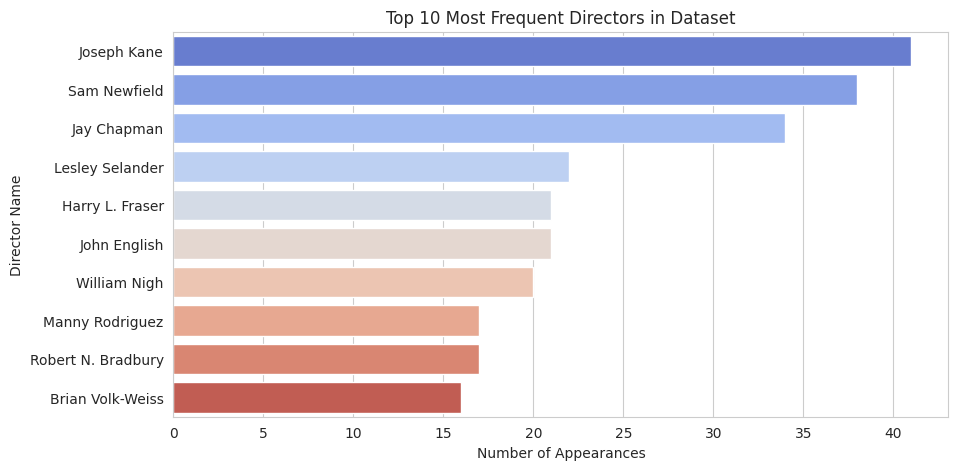

In [33]:
# Most frequent directors in the dataset
top_directors = df2[df2["role"] == "DIRECTOR"]["name"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")
plt.title("Top 10 Most Frequent Directors in Dataset")
plt.xlabel("Number of Appearances")
plt.ylabel("Director Name")
plt.show()

#### **Insights**

The most frequent actors appear in multiple movies/shows, likely indicating prominent TV or movie stars.

The most frequent directors likely have multiple works in the dataset, possibly from long-running series or popular franchises.

#### **Proposed Business Solutions:**

For Streaming Platforms (e.g., Netflix, Prime Video)

Focus on acquiring highly-rated content (IMDb 7+) to retain viewership.

Target trending genres like Drama & Action for better engagement.

Invest in productions from top-performing countries like the USA & India.

For Movie Production Houses

Collaborate with most frequent actors & directors to boost popularity.

Release more content in peak content production years (capitalize on audience trends).

Prioritize genres that show consistent demand.

For Content Marketers & Advertisers

Target audiences based on genre preferences (e.g., Action for young adults, Drama for mature viewers).

Leverage IMDb scores for content recommendations & ad targeting.

**Conclusion**

This EDA provided valuable insights into industry trends, allowing businesses to make data-driven decisions. By focusing on popular genres, top-performing actors/directors, and audience preferences, companies can enhance content strategies and maximize engagement.